<a href="https://colab.research.google.com/github/Komsomolochka/stats-for-data-analysis/blob/main/credit_scoring/credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/credit_card_default_analysis.csv')

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Задание 1

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 

Text(0.5, 1.0, 'Распределение размера кредитного лимита для невернувших кредит')

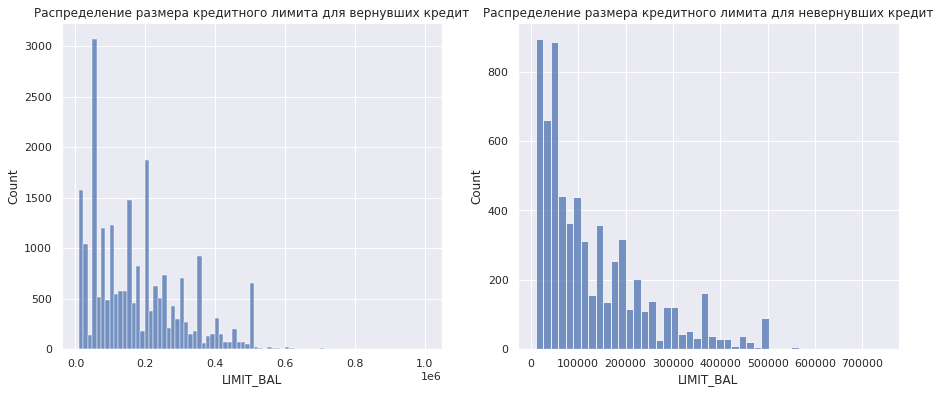

In [ ]:
# строим графики распределения
sns.set(rc={'figure.figsize':(15,6)})
plt.subplot(1, 2, 1)
sns.histplot(x=data[data['default']==0]['LIMIT_BAL']).set_title('Распределение размера кредитного лимита для вернувших кредит')
plt.subplot(1, 2, 2)
sns.histplot(x=data[data['default']==1]['LIMIT_BAL']).set_title('Распределение размера кредитного лимита для невернувших кредит')

Text(0.5, 1.0, 'Сравнение кредитных лимитов у 2 групп')

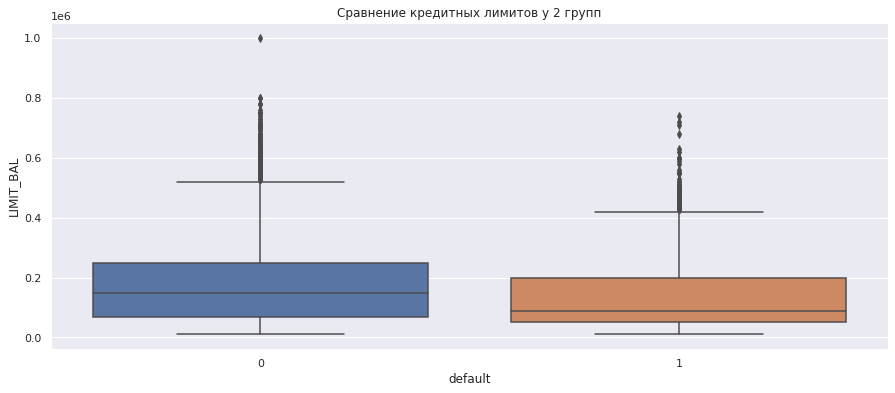

In [ ]:
# строим сравнительные boxplots
sns.boxplot(y=data['LIMIT_BAL'], x=data['default']).set_title('Сравнение кредитных лимитов у 2 групп')

*На графике видно, что медиана размера кредитного лимита у вернувших кредит меньше, чем у невернувших, но интерквартильные размахи пересекаются. Распределения 2х групп похожи между собой. Распределения не похожи на нормальные. По графикам нельзя сделать однозначный вывод о средних/медианах в 2 группах.*

 a)  о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 

H_0: медианы равны в 2х выборках

Н_1: медианы отличаются

In [ ]:
# создаем выборки
data_def_0 = data[data['default']==0]['LIMIT_BAL'].values
data_def_1 = data[data['default']==1]['LIMIT_BAL'].values

In [ ]:
# используем bootstrap
# функция создания подвыборок для bootstrap
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [ ]:
samples_def_0 = get_bootstrap_samples(data_def_0, 1000)
samples_def_1 = get_bootstrap_samples(data_def_1, 1000)

In [ ]:
# расчитываем разницу медиан
medians = list(map(lambda x: np.median(x[1]) - np.median(x[0]), zip(samples_def_0, samples_def_1)))

In [ ]:
# функция интервалов
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
# расчитываем медианные интервалы
intervals = stat_intervals(medians, 0.05)

In [ ]:
intervals

array([-70000., -60000.])

*Медианный интервал не содержит 0, значит медианные значения не равны*

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.  Значимы ли полученные результаты с практической точки зрения ?

Н_0: средние двух выборок равны

Н_1: средние двух выборок отличаются

In [ ]:
# используем тест Манна-Уитни, так как распределения данных не похожи на нормальные
stat, p = stats.mannwhitneyu(data_def_0, data_def_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Не можем отвергнуть гипотезу о равенстве средних')
else:
	print('Отвергаем гипотезу о равенстве средних на уровне значимости 0,05')

Statistics=59257217.500, p=0.000
Отвергаем гипотезу о равенстве средних на уровне значимости 0,05


*С практической точки зрения результат (-70000 < median < -60000 денежных единиц) - достаточно большая разница между группами, разница является значимой*

## Задание 2

Пол (SEX): Проверьте гипотезу о том,  что гендерный состав  группы людей вернувших и не вернувших кредит отличается.  Хорошо, если вы предоставите несколько различных решений  этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

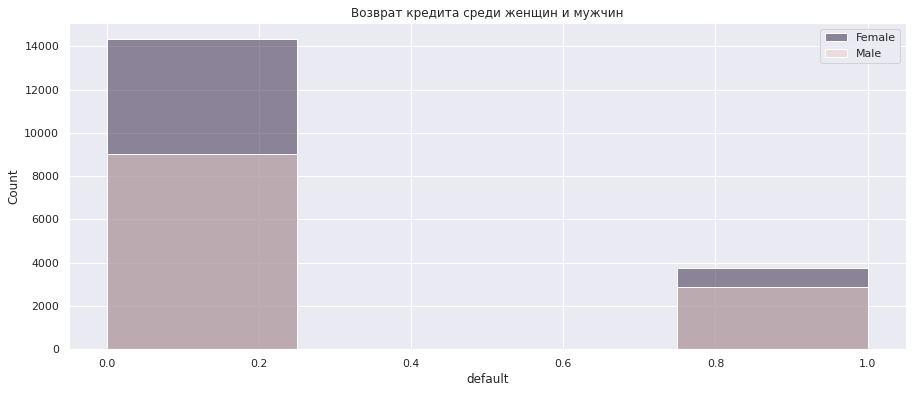

In [ ]:
# строим графики распределения
sns.histplot(data=data, x="default", binwidth=0.25, hue="SEX").set_title('Возврат кредита среди женщин и мужчин')
plt.legend(labels=["Female","Male"])

*На графике видно, что распределение биномиальное. Также похоже, что мужчины чаще не возвращают кредит*

In [ ]:
# создаем выборки
data_def_0 = data[data['SEX']==2]['default']
data_def_1 = data[data['SEX']==1]['default']

In [ ]:
# строим доверительные интервалы методом Уилсона
conf_interval_def_0 = proportion_confint(sum(data_def_0), len(data_def_0), method = 'wilson')
conf_interval_def_1 = proportion_confint(sum(data_def_1), len(data_def_1), method = 'wilson')

In [ ]:
print('95%% доверительный интервал для женщин: [%f, %f]' % conf_interval_def_0)
print('95%% доверительный интервал для мужчин: [%f, %f]' % conf_interval_def_1)

95% доверительный интервал для женщин: [0.201917, 0.213733]
95% доверительный интервал для мужчин: [0.234061, 0.249450]


*Интервалы не пересекаются, значит мужчины не возвращают кредиты чаще, чем женщины*

In [ ]:
# Z-критерий для разности долей
# функция для Z-критерия и интервалов 
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [ ]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [ ]:
print("95%% доверительный интервал для разницы долей: [%f, %f]" %\
      proportions_diff_confint_ind(data_def_1, data_def_0))

95% доверительный интервал для разницы долей: [0.033635, 0.060548]


In [ ]:
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(data_def_1, data_def_0)))

p-value: 0.000000


*0 не попадает в доверительный интервал разницы долей, p-value < 0.05. Можно утверждать, что гендерный состав отличается, мужчины чаще не возвращают кредит. Н_0 отвергается*

# Задание 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.  Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы  разность между наблюдаемым и ожидаемым количеством человек.  Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?  Наличие какого образования является наилучшим индикатором того, что человек  отдаст долг ? наоборт, не отдаст долг ?

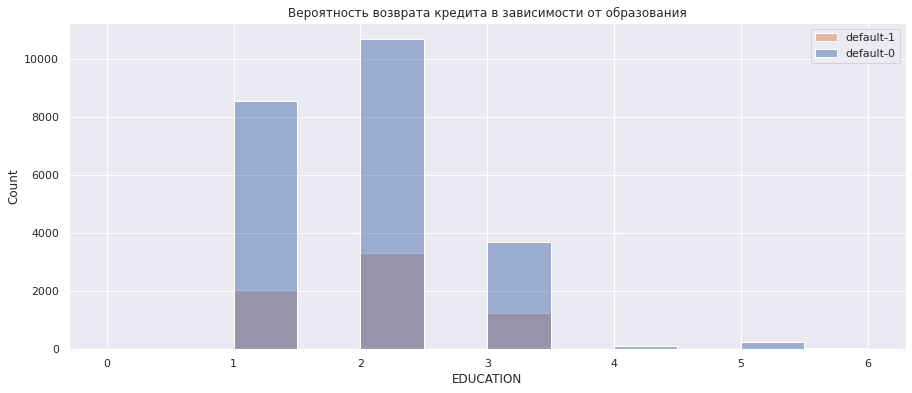

In [ ]:
# строим графики распределения
sns.histplot(data=data, x='EDUCATION', binwidth=0.5, hue="default").set_title('Вероятность возврата кредита в зависимости от образования')
plt.legend(labels=["default-1","default-0"])

*Судя по графику, чаще берут кредиты люди с образованием 1, 2 и 3 (магистр, бакалавр, выпускник). По графику нельзя утверждать о наличии взаимосвязи между уровнем образования и вероятностью возврата кредита*

Н_0: нет связи между образованием и вероятностью вернуть кредит

Н_1: связь есть

In [ ]:
# таблица наблюдаемых значений
observed_values = pd.crosstab(data['EDUCATION'], data['default'])

In [ ]:
observed_values

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


*Для применения критерия Хи-квадрат доля ячеек х<=5 должна быть менее 20%. Условие соблюдается*

In [ ]:
# таблица ожидаемых значений
stat, p, dof, expected_values = stats.chi2_contingency(observed_values)

In [ ]:
expected_values = pd.DataFrame(expected_values)

In [ ]:
# таблица разности наблюдаемых и ожидаемых значений
diff = observed_values - expected_values
diff

default,0,1
EDUCATION,,
0,3.0968,-3.0968
1,305.4020,-305.4020
2,-226.5640,226.5640
3,-149.3596,149.3596
4,20.2076,-20.2076
5,43.9360,-43.9360
6,3.2812,-3.2812


In [ ]:
# тест Хи-квадрат
stats.chisquare(observed_values[1], expected_values[1], ddof=1)

Power_divergenceResult(statistic=127.11305526913317, pvalue=9.75132616866625e-26)

*Отвергается Н_0 на уровне значимости 0,05. Можно сделать вывод, что есть взаимосвязь между образованием и вероятностью возврата долга.
Для улучшения интерпретированности можно нормализовать данные.*

In [ ]:
diff_norm = pd.DataFrame()

In [ ]:
# для тех, кто выплатил кредит
edu_min_0=np.min(diff[0].values)
edu_max_0=np.max(diff[0].values)
normalized_0 = lambda x: (x-edu_min_0)/(edu_max_0-edu_min_0)
diff_norm['default_0']=diff[0].apply(normalized_0)

In [ ]:
# для тех, кто не выплатил кредит
edu_min_1=np.min(diff[1].values)
edu_max_1=np.max(diff[1].values)
normalized_1 = lambda x: (x-edu_min_1)/(edu_max_1-edu_min_1)
diff_norm['default_1']=diff[1].apply(normalized_1)

In [ ]:
diff_norm

,default_0,default_1
EDUCATION,,
0,0.431721,0.568279
1,1.000000,0.000000
2,0.000000,1.000000
3,0.145130,0.854870
4,0.463886,0.536114
5,0.508491,0.491509
6,0.432067,0.567933


*Чаще всего отдают кредиты люди с образованием 1 (магистры). Чаще всего не отдают долги люди с образованием 2 (бакалавры).*

## Задание 4

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

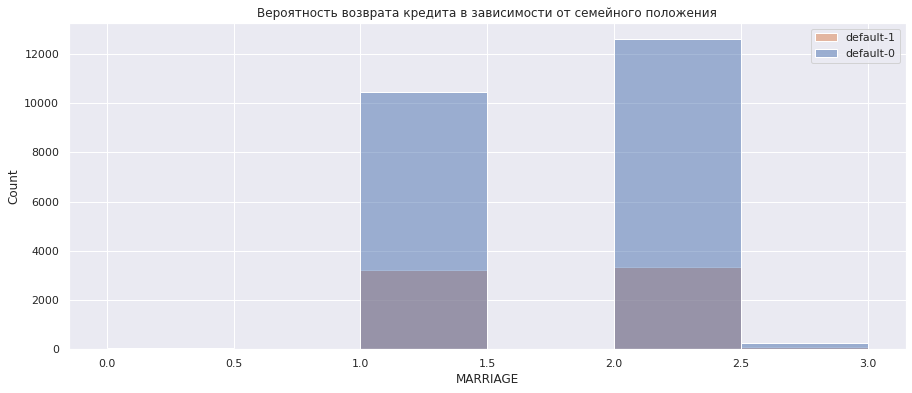

In [38]:
# строим графики распределения
sns.histplot(data=data, x='MARRIAGE', binwidth=0.5, hue="default").set_title('Вероятность возврата кредита в зависимости от семейного положения')
plt.legend(labels=["default-1","default-0"])

*Холостые берут кредиты чаще и отдают реже*

Н_0: признаки не связаны

Н_1: между признаками есть связь

In [8]:
# строим таблицу сопряженности
contingency_table = pd.crosstab(data['MARRIAGE'], data['default'])


In [9]:
contingency_table

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


*Для применения критерия Хи-квадрат доля ячеек х<=5 должна быть менее 20%. Условие соблюдается*

In [18]:
# применяем Хи-критерий
stat, p, dof, expected_table = stats.chi2_contingency(contingency_table)

In [19]:
p

8.825862457577375e-08

*Гипотеза Н_0 отвергается на уровне значимости 0,05. Зависимость между признаками есть*

In [20]:
# так как переменные категориальные, считаем коэффициент V Крамера
n=contingency_table[0].sum()+contingency_table[1].sum()
np.sqrt(stat / (n*(2-1)))

0.034478203662766466

*Связь между признаками есть, но небольшая*

# Задание 5

Возраст (AGE): Относительно двух групп людей  вернувших и не вернувших кредит  проверьте следующие гипотезы:   a)  о равенстве медианных значений возрастов людей   b) о равенстве распределений  с помощью одного из подходящих непараметрических критериев проверки равенства средних.  Значимы ли полученные результаты с практической точки зрения ?

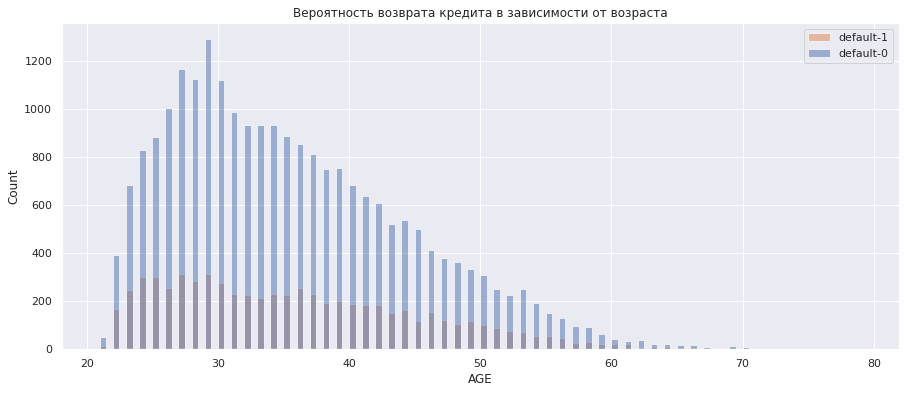

In [37]:
# строим графики распределения
sns.histplot(data=data, x='AGE', binwidth=0.5, hue="default").set_title('Вероятность возврата кредита в зависимости от возраста')
plt.legend(labels=["default-1","default-0"])

H_0: медианы равны в 2х выборках

Н_1: медианы отличаются

In [23]:
# создаем выборки
data_def_0 = data[data['default']==0]['AGE'].values
data_def_1 = data[data['default']==1]['AGE'].values

In [24]:
# используем bootstrap
# функция создания подвыборок для bootstrap
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [25]:
samples_def_0 = get_bootstrap_samples(data_def_0, 1000)
samples_def_1 = get_bootstrap_samples(data_def_1, 1000)

In [26]:
# расчитываем разницу медиан
medians = list(map(lambda x: np.median(x[1]) - np.median(x[0]), zip(samples_def_0, samples_def_1)))

In [30]:
# функция интервалов
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [28]:
# расчитываем медианные интервалы
intervals = stat_intervals(medians, 0.05)

In [29]:
intervals

array([0., 1.])

*Медианный интервал содержит 0, значит медианные значения равны*

Н_0: средние двух выборок равны

Н_1: средние двух выборок отличаются

In [36]:
# в качестве непараметрического критерия используем Манна-Уитни
stat, p = stats.mannwhitneyu(data_def_0, data_def_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Не можем отвергнуть гипотезу о равенстве средних')
else:
	print('Отвергаем гипотезу о равенстве средних на уровне значимости 0,05')

Statistics=76966879.500, p=0.186
Не можем отвергнуть гипотезу о равенстве средних
